## Some column may contain mixed value.Like cabin = [B1,CF3,BJ32,JKS34,FD44.....].So this value have to be splitted into two columns i.e. categorical = [B,CF,BJ,JKS,FD..],numerical = [1,3,32,34,44.....] .Also when some column contains values like [5,4,2,33,56,a,c,v,t,d,6,...] same thing have to be applied here !

In [2]:
import pandas as pd
import numpy as np

In [38]:
number = pd.DataFrame({'number':[1,2,'a',5,'s','s','j',8,4,2]})

In [32]:
df = pd.read_csv('train.csv',usecols=['Cabin','Ticket','Survived'])

In [34]:
df = df.iloc[0:11,:]

In [36]:
df

,Survived,Ticket,Cabin
0,0,A/5 21171,NaN
1,1,PC 17599,C85
2,1,STON/O2. 3101282,NaN
3,1,113803,C123
4,0,373450,NaN
5,0,330877,NaN
6,0,17463,E46
7,0,349909,NaN
8,1,347742,NaN
9,1,237736,NaN


In [44]:
bi = pd.concat([df,number],axis = 1) #Axis 1 vayo vaney side bata jodxa.Axis 0 vayo vaney tala bata

In [46]:
bi

,Survived,Ticket,Cabin,number
0,0,A/5 21171,NaN,1
1,1,PC 17599,C85,2
2,1,STON/O2. 3101282,NaN,a
3,1,113803,C123,5
4,0,373450,NaN,s
5,0,330877,NaN,s
6,0,17463,E46,j
7,0,349909,NaN,8
8,1,347742,NaN,4
9,1,237736,NaN,2


In [52]:
bi.fillna(0)

,Survived,Ticket,Cabin,number
0,0,A/5 21171,0,1
1,1,PC 17599,C85,2
2,1,STON/O2. 3101282,0,a
3,1,113803,C123,5
4,0,373450,0,s
5,0,330877,0,s
6,0,17463,E46,j
7,0,349909,0,8
8,1,347742,0,4
9,1,237736,0,2


In [78]:
bi['Ticket']

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
Name: Ticket, dtype: object

In [84]:
# Extract categorical and numerical parts
df['Categorical_ticket'] = bi['Ticket'].str.extract(r'([a-zA-Z\s\./]+)', expand=False).str.strip()
df['Numerical_ticket'] = bi['Ticket'].str.extract(r'(\d+)', expand=False)

In [86]:
df

,Survived,Ticket,Cabin,Categorical,Numerical,Categorical_ticket,Numerical_ticket
0,0,A/5 21171,NaN,A/,5,A/,5
1,1,PC 17599,C85,PC,17599,PC,17599
2,1,STON/O2. 3101282,NaN,STON/O,2,STON/O,2
3,1,113803,C123,NaN,113803,NaN,113803
4,0,373450,NaN,NaN,373450,NaN,373450
5,0,330877,NaN,NaN,330877,NaN,330877
6,0,17463,E46,NaN,17463,NaN,17463
7,0,349909,NaN,NaN,349909,NaN,349909
8,1,347742,NaN,NaN,347742,NaN,347742
9,1,237736,NaN,NaN,237736,NaN,237736


In [90]:
df = df.drop(['Categorical','Numerical'],axis = 1)

In [100]:
df['Categorical_Cabin'] = bi['Cabin'].str.extract(r'([a-zA-Z\s\./]+)', expand=False).str.strip()
df['Numerical_Cabin'] = bi['Cabin'].str.extract(r'(\d+)', expand=False)

In [106]:
df

,Survived,Ticket,Cabin,Categorical_ticket,Numerical_ticket,Categorical_Cabin,Numerical_Cabin
0,0,A/5 21171,NaN,A/,5,NaN,NaN
1,1,PC 17599,C85,PC,17599,C,85
2,1,STON/O2. 3101282,NaN,STON/O,2,NaN,NaN
3,1,113803,C123,NaN,113803,C,123
4,0,373450,NaN,NaN,373450,NaN,NaN
5,0,330877,NaN,NaN,330877,NaN,NaN
6,0,17463,E46,NaN,17463,E,46
7,0,349909,NaN,NaN,349909,NaN,NaN
8,1,347742,NaN,NaN,347742,NaN,NaN
9,1,237736,NaN,NaN,237736,NaN,NaN


In [108]:
df.drop(['Ticket','Cabin'],axis = 1,inplace = True)

In [110]:
df

,Survived,Categorical_ticket,Numerical_ticket,Categorical_Cabin,Numerical_Cabin
0,0,A/,5,NaN,NaN
1,1,PC,17599,C,85
2,1,STON/O,2,NaN,NaN
3,1,NaN,113803,C,123
4,0,NaN,373450,NaN,NaN
5,0,NaN,330877,NaN,NaN
6,0,NaN,17463,E,46
7,0,NaN,349909,NaN,NaN
8,1,NaN,347742,NaN,NaN
9,1,NaN,237736,NaN,NaN


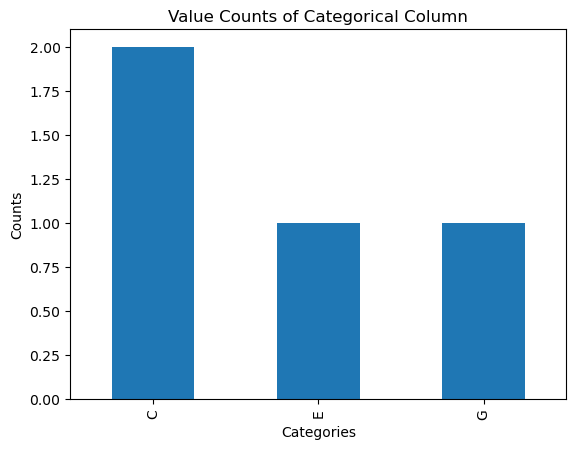

In [124]:
import matplotlib.pyplot as plt
df['Categorical_Cabin'].value_counts().plot(kind='bar')
plt.title('Value Counts of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.show()